In [1]:
# Assignment 25.1 - Build the random forest model after normalizing the variable to house pricing from boston data set.

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import *
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

In [3]:
# Load the Boston Housing dataset 
boston = datasets.load_boston()
# Initialize the  features and target

features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [4]:
features.shape

(506, 13)

In [5]:
targets.shape

(506,)

In [6]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
features.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

In [8]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [9]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
feature_names = boston.feature_names

In [11]:
feature_desc = ["Per Capita Crime Rate by Town",
                "Proportion of Residential Land Zoned for Lots over 25,000 sq.ft.",
                "Proportion of Non-retail Business Acres per Town",
                "Charles River Dummy Variable (= 1 if Tract Bounds River; 0 Otherwise)",
                "Nitric Oxides Concentration (Parts per 10 Million)",
                "Average Number of Rooms per Dwelling",
                "Proportion of Owner-occupied Units Built Prior to 1940",
                "Weighted Distances to Five Boston Employment Centres",
                "Index of Accessibility to Radial Highways",
                "Full-value Property-tax Rate per $10,000",
                "Pupil-teacher Ratio by Town",
                "1000(Bk - 0.63)^2 where Bk is the Proportion of Blacks by Town",
                "% Lower Status of the Population"]

resultcols = ["Feature",
              "Description"]

results_df = pd.DataFrame([])

for f in enumerate(feature_names):
    feat_desc = feature_desc[f[0]]
    temp_df = pd.DataFrame([[f[1],
                             feat_desc]],
                             index = [f[0]], columns = resultcols)

    results_df = results_df.append(temp_df)

print("Table 1: Feature Reference Table")
results_df

Table 1: Feature Reference Table


,Feature,Description
0,CRIM,Per Capita Crime Rate by Town
1,ZN,Proportion of Residential Land Zoned for Lots ...
2,INDUS,Proportion of Non-retail Business Acres per Town
3,CHAS,Charles River Dummy Variable (= 1 if Tract Bou...
4,NOX,Nitric Oxides Concentration (Parts per 10 Mill...
5,RM,Average Number of Rooms per Dwelling
6,AGE,Proportion of Owner-occupied Units Built Prior...
7,DIS,Weighted Distances to Five Boston Employment C...
8,RAD,Index of Accessibility to Radial Highways
9,TAX,"Full-value Property-tax Rate per $10,000"


Statistical Analysis and Data Exploration

In this first section of the project, we will  investigate a few basic statistics about the dataset working with. 
In addition, we will look at the client's feature set in CLIENT_FEATURES and see how this particular sample 
relates to the features of the dataset. Familiarizing  with the data through an explorative process is a fundamental 
practice to help  understand the results better.

In the code block below, the imported numpy library is used to calculate the requested statistics. 

The print statements will show the statistics you calculate!

In [12]:
# Number of houses in the dataset
total_houses = len(features)

# Number of features in the dataset
features_shape = np.shape(features)
total_features = features_shape[1]

#  Minimum price of the data
minimum_price = np.min(targets)
# Alternative using pandas
# minimum_price = targets.min()

#  Maximum price of the data
maximum_price = np.max(targets)
# Alternative using pandas
# maximum_price = targets.max()

#  Mean price of the data
mean_price = np.mean(targets)
# Alternative using pandas
# mean_price = targets.mean()

#  Median price of the data
median_price = np.median(targets)
# Alternative using pandas
# median_price = targets.median()

#  Standard deviation of prices of the data
std_price = np.std(targets)
# Alternative using pandas 
# std_price = prices.std(ddof=0)

# There are other statistics you can calculate too like quartiles
first_quartile = np.percentile(targets, 25)
third_quartile = np.percentile(targets, 75)
inter_quartile = third_quartile - first_quartile

# Show the calculated statistics

print("Boston Housing dataset statistics (Price in $1000's) \n")
print("Total number of houses:", total_houses)
print("Total number of features:", total_features)

print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))
print ("First quartile of prices: ${:,.2f}".format(first_quartile))
print ("Second quartile of prices: ${:,.2f}".format(third_quartile))
print ("Interquartile (IQR) of prices: ${:,.2f}".format(inter_quartile))
print("Standard deviation of house price: {0:.3f}".format(std_price))

Boston Housing dataset statistics (Price in $1000's) 

Total number of houses: 506
Total number of features: 13
Minimum price: $5.00
Maximum price: $50.00
Mean price: $22.53
Median price $21.20
Standard deviation of prices: $9.19
First quartile of prices: $17.02
Second quartile of prices: $25.00
Interquartile (IQR) of prices: $7.98
Standard deviation of house price: 9.188


In [13]:
# Normalize data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,targets,test_size=0.25,random_state=33)

#Feature Scaling
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(np.reshape(y_train,(-1,1)))

In [14]:
X_train = scalerX.transform(X_train)
y_train = scalery.transform(np.reshape(y_train,(-1,1)))

X_test = scalerX.transform(X_test)
y_test = scalery.transform(np.reshape(y_test,(-1,1)))

print (np.max(X_train), np.min(X_train), np.mean(X_train), np.max(y_train), np.min(y_train), np.mean(y_train))
# converting reshaped Y vector into array again
y_train=y_train.flatten(order='C')
y_test=y_test.flatten(order='C')

10.190454845432923 -4.6670204084548 2.4732713452985016e-15 2.9177492036731256 -1.931470986413033 3.5855223803197665e-16


In [15]:
# Fitting Regression to the Training set
from sklearn import ensemble
regressor=ensemble.RandomForestRegressor(n_estimators=10,random_state=42)
regressor.fit(X_train, y_train)

print ("Coefficient of determination on training set:",regressor.score(X_train, y_train))

Coefficient of determination on training set: 0.9704633064732715


In [16]:
regressor.score(X_test, y_test)

0.812229915489501

In [17]:
cv = KFold(n_splits=5, shuffle=True, random_state=33)
scores = cross_val_score(regressor, X_train, y_train, cv=cv)
print ("Coefficient of determination using 5-fold crossvalidation:",np.mean(scores))

Coefficient of determination using 5-fold crossvalidation: 0.8228281056380199


In [18]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [19]:
# CHECK Calculate the absolute errors # Method - 1

errors = abs(y_pred - y_test)
# Print out the mean absolute error
print('Mean Absolute Error:', round(np.mean(errors),3))

Mean Absolute Error: 0.257


In [20]:
# CHECK Calculate the absolute errors # Method - 2

from sklearn.metrics import mean_absolute_error
round(mean_absolute_error(y_test, y_pred),3)

0.257

In [21]:
# Calculate the Mean Square Error  # Method - 1

errorssquare = errors * errors
# Print out the mean absolute error
print('Mean Square Error :', round(np.mean(errorssquare),3))

Mean Square Error : 0.169


In [22]:
# Calculate the Mean Square Error  # Method - 2

from sklearn.metrics import mean_squared_error

print('Mean Square Error :', round(mean_squared_error(y_test, y_pred),3))

Mean Square Error : 0.169


In [23]:
important=zip(regressor.feature_importances_,boston.feature_names)
print (sorted(important))

[(0.0009808199743778538, 'CHAS'), (0.001227439001115376, 'ZN'), (0.0031651367705717733, 'RAD'), (0.010746974375737748, 'INDUS'), (0.011596711622899013, 'NOX'), (0.01230925873213042, 'B'), (0.01696681204273749, 'AGE'), (0.017268886437155507, 'PTRATIO'), (0.0211809756835178, 'TAX'), (0.03725972308802442, 'CRIM'), (0.05467084205423646, 'DIS'), (0.3630390390388699, 'LSTAT'), (0.4495873811786262, 'RM')]


In [24]:
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

In [25]:
indices

array([ 5, 12,  7,  0,  9, 10,  6, 11,  4,  2,  8,  1,  3], dtype=int64)

In [26]:
#for tree in regressor.estimators_ :
    #print(tree.feature_importances_ )
    #print(np.std(tree.feature_importances_ ,axis=0))

In [27]:
importances

array([0.03725972, 0.00122744, 0.01074697, 0.00098082, 0.01159671,
       0.44958738, 0.01696681, 0.05467084, 0.00316514, 0.02118098,
       0.01726889, 0.01230926, 0.36303904])

Feature ranking:
1. feature 5 (0.449587)  -  RM
2. feature 12 (0.363039)  -  LSTAT
3. feature 7 (0.054671)  -  DIS
4. feature 0 (0.037260)  -  CRIM
5. feature 9 (0.021181)  -  TAX
6. feature 10 (0.017269)  -  PTRATIO
7. feature 6 (0.016967)  -  AGE
8. feature 11 (0.012309)  -  B
9. feature 4 (0.011597)  -  NOX
10. feature 2 (0.010747)  -  INDUS
11. feature 8 (0.003165)  -  RAD
12. feature 1 (0.001227)  -  ZN
13. feature 3 (0.000981)  -  CHAS


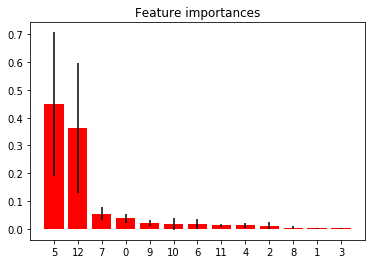

In [28]:
# Print the feature ranking
cc=list(zip(regressor.feature_importances_,boston.feature_names))

print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]])," - ",cc[indices[f]][1])
    
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)

#plt.xticks(range(X_train.shape[1]), cc[indices[f]][1])


plt.xlim([-1, X_train.shape[1]])
plt.show()

In [29]:
#Calculating R Square / Cooeficient of Determination

from sklearn.metrics import r2_score
print('R Square Error / Coefficient of determination: ', round(r2_score(y_test, y_pred)*100,3))

R Square Error / Coefficient of determination:  81.223


R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean

In general, the higher the R-squared, the better the model fits your data, with 81.223 % Model is good